# Regresión

## Configuraciones previas

En primer lugar, vamos a importar algunos módulos comunes, asegurarnos de que MatplotLib visualiza las figuras en línea y preparar una función para guardar las figuras. También comprobamos que Python 3.5 o posterior está instalado, así como Scikit-Learn ≥0.20.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Regresión lineal

Anteriormente vimos un modelo de regresión simple para predecir el índice de bienestar:

<center>
$ \text{Índice de bienestar} = \theta_0 + \theta_1 \times \text{PIB_per_capita}$
</center>

- Este modelo es sólo una **función lineal** de la característica de entrada PIB_per_capita.
- $\theta_0$ y $\theta_1$ son los parámetros del modelo.

De forma más general, un modelo lineal hace una predicción simplemente calculando una **suma ponderada de las características de entrada**, más una constante llamada **término de sesgo** (también llamada **término de intersección**):

<center>
$\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n$.
</center>

- $\hat{y}$ es el valor predicho.
- $n$ es el número de características.
- $x_i$ es el valor de la característica $i^{th}$.
- $\theta_j$ es el parámetro $j^{th}$ del modelo (incluyendo el término de sesgo $\theta_0$ y los pesos de las características $\theta_1, \theta_2, \dots, \theta_n$).

Esto se puede escribir de forma mucho más concisa utilizando una forma vectorizada:

<center>
$\hat{y} = h_{\theta}(x) = \theta \cdot x$.
</center>

- $\theta$ es el vector de parámetros del modelo, el término de sesgo $\theta_0$ y los pesos de las características $\theta_1, \theta_2, \dots, \theta_n$.
- x es el vector de características de la muestra, que contiene de $x_0$ a $x_n$, siendo $x_0$ siempre igual a 1.
- $h$ es la función de hipótesis, utilizando los parámetros del modelo $\theta$.

¿Cómo lo **entrenamos**?

- Entrenar un modelo significa **ajustar sus parámetros** para que el modelo se ajuste lo mejor posible al conjunto de datos de entrenamiento.
- Para ello, primero necesitamos una medida de lo bien (o mal) que el modelo se ajusta a los datos de entrenamiento.
- Anteriormente vimos que la medida de rendimiento más común de un modelo de regresión es el error cuadrático medio (RMSE).
- Por lo tanto, para entrenar un modelo de regresión lineal, es necesario encontrar el **valor de $\theta$ que minimice el RMSE**.
- Es más sencillo minimizar el **Error Cuadrático Medio (MSE)** que el RMSE, y conduce al mismo resultado
  - porque el valor que minimiza una función también minimiza su raíz cuadrada.

El MSE de una hipótesis de Regresión Lineal $h_{\theta}$ sobre un conjunto de entrenamiento X se calcula utilizando:

<center>
$\text{MSE}(X,h_{\\theta}) = \frac{1}{m} \sum_{i=1}^m ( \theta^T x^{(i)} - y^{(i)} )^2$
</center>

## La ecuación normal

Para encontrar el valor de $\theta$ que minimiza la función de coste, existe una ecuación matemática que da el resultado directamente, la **Ecuación Normal**.

<center>
$ \hat{\theta} = (X^T X)^{-1} X^T y$
</center>

  - $\hat{\theta}$ es el valor de $\theta$ que minimiza la función de coste.
  - $y$ es el vector de valores objetivo que contiene $y^{(1)}$ a $y^{(m)}$.

Vamos a generar algunos datos de aspecto lineal para probar esta ecuación:

In [2]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Saving figure generated_data_plot


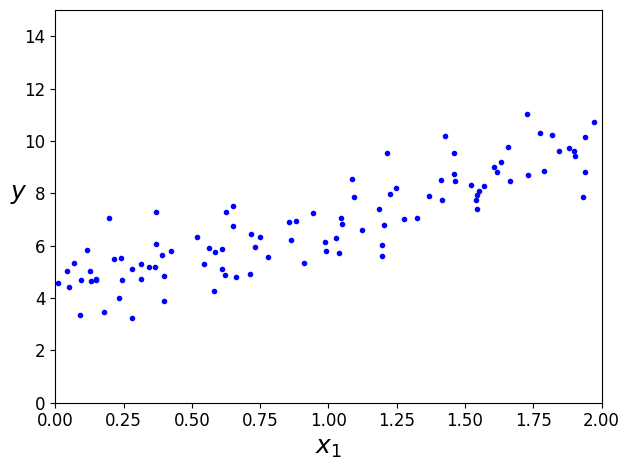

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

Ahora vamos a calcular $\hat{\theta}$ utilizando la Ecuación Normal.
- Utilizaremos la función `inv()` del módulo de Álgebra Lineal de NumPy (`np.linalg`) para calcular la inversa de una matriz,
- y el operador `@` para la multiplicación de matrices:

In [4]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

La función real que hemos utilizado para generar los datos es $y = 4 + 3x_1 +$ ruido gaussiano. Veamos lo que encontró la ecuación:

In [5]:
theta_best

array([[4.21509616],
       [2.77011339]])

Habríamos esperado $\theta_0 = 4$ y $\theta_1 = 3$ en lugar de $\theta_0 = 4,215$ y $\theta_1 = 2,770$.

- Bastante cerca, pero el ruido hace imposible recuperar los parámetros exactos de la función original.

Ahora podemos hacer predicciones utilizando $\hat{\theta}$:

In [6]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

Vamos a visualizar las predicciones de este modelo:

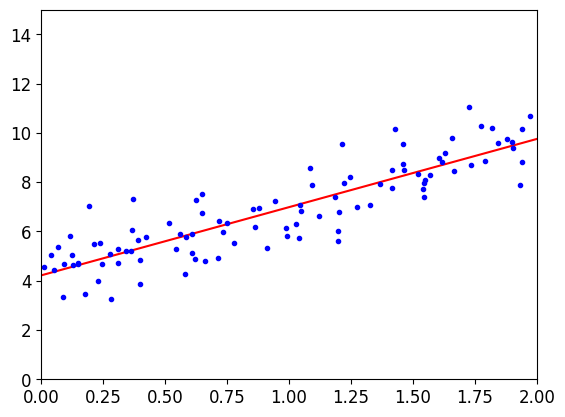

In [7]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

Realizar una **regresión lineal con Scikit-Learn** es bastante sencillo:

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [9]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

La clase `LinearRegression` se basa en la función `scipy.linalg.lstsq()` (el nombre significa "mínimos cuadrados"), que podrías llamar directamente:

In [10]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

Esta función calcula $\hat{\mathbf{\theta}} = \mathbf{X}^+\mathbf{y}$, donde $\mathbf{X}^{+}$ es la _pseudoinversa_ de $\mathbf{X}$ (concretamente la inversa de Moore-Penrose). Puede utilizar `np.linalg.pinv()` para calcular la pseudoinversa directamente:

In [11]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

El pseudoinverso se calcula mediante una técnica estándar de factorización de matrices
llamada **Singular Value Decomposition** (**SVD**).

- El enfoque SVD utilizado por la clase `LinearRegression` de Scikit-Learn es aproximadamente $O(n^2)$.
- Tanto la Ecuación Normal como el enfoque SVD se vuelven muy lentos cuando el número de características aumenta (por ejemplo, 100.000).
- Por el contrario, ambos son lineales con respecto al número de muestras en el conjunto de entrenamiento (son $O(m)$),
  - por lo que manejan conjuntos de entrenamiento grandes, siempre que quepan en la memoria.
- Además, una vez que se ha entrenado su modelo de Regresión Lineal (utilizando la Ecuación Normal o cualquier otro algoritmo), las predicciones son muy rápidas:
  - La complejidad computacional es lineal con respecto al número de muestras sobre las que desea hacer predicciones y al número de características.
  - En otras palabras, hacer predicciones sobre el doble de muestras (o el doble de características) llevará aproximadamente el doble de tiempo.

# Descenso del gradiente (Gradient Descent)

**Gradient Descent** es un **algoritmo de optimización** genérico capaz de encontrar
soluciones óptimas a una amplia gama de problemas.

- La idea general de Gradient Descent es **modificar los parámetros de forma iterativa** para **minimizar una función de coste**.

Por ejemplo, supongamos que estamos perdidos en las montañas, en medio de una densa niebla, y que sólo podemos sentir la pendiente del suelo bajo nuestros pies.

- Una buena estrategia para llegar rápidamente al fondo del valle es ir cuesta abajo en la dirección de la pendiente más pronunciada.

- Esto es exactamente lo que hace Gradient Descent:
  - mide el gradiente local de la función de error con respecto al vector de parámetros $\theta$,
  - y va en la dirección del gradiente descendente.
  - Una vez que el gradiente es cero, ¡se ha alcanzado un mínimo!

Concretamente, se empieza llenando $\theta$ con valores aleatorios (esto se llama inicialización aleatoria),

- y luego se mejora gradualmente, dando un pequeño paso a la vez,
- cada paso tratando de disminuir la función de coste (por ejemplo, el MSE), hasta que el algoritmo converge a un mínimo.

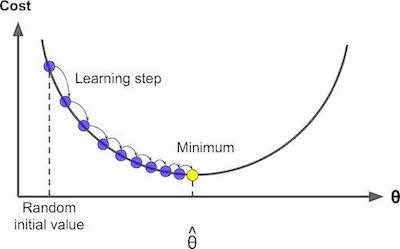

Un parámetro importante en Gradient Descent es el tamaño de los pasos, determinado por el **learning rate**.

- Si learning rate es demasiado pequeña, el algoritmo tendrá que pasar por muchas iteraciones para converger, lo que llevará mucho tiempo.

- Por otro lado, si la tasa de aprendizaje es demasiado alta, podría saltar a través del valle y terminar en el otro lado, posiblemente incluso más arriba de lo que estaba antes.
  - Esto podría hacer que el algoritmo divergiera, con valores cada vez mayores, sin encontrar una buena solución.

Por último, no todas las funciones de coste parecen bonitos cuencos regulares. Puede haber agujeros, crestas, mesetas y todo tipo de terrenos irregulares, lo que dificulta mucho la convergencia al mínimo.

- La siguiente figura muestra los dos retos principales con Gradient Descent:
  - si la inicialización aleatoria inicia el algoritmo a la izquierda, entonces convergerá a un mínimo local, que no es tan bueno como el mínimo global.
  - Si comienza por la derecha, entonces tardará mucho tiempo en cruzar la meseta, y si se detiene demasiado pronto nunca alcanzará el mínimo global.

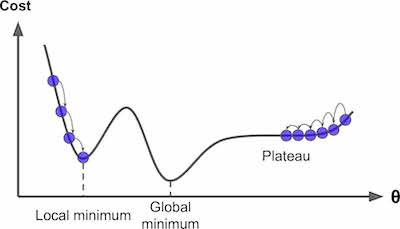

Afortunadamente, la función de coste MSE para un modelo de Regresión Lineal resulta ser una función convexa,

- lo que significa que si se eligen dos puntos cualesquiera de la curva, el segmento de línea que los une nunca cruza la curva.

- Esto implica que no hay mínimos locales, sólo un mínimo global.

## Descenso gradual por lotes (Batch Gradient Descent)

Para implementar Gradient Descent, es necesario calcular el gradiente de la función de coste con respecto a cada parámetro del modelo $\theta_j$.

- En otras palabras, es necesario calcular cuánto va a cambiar la función de coste si cambia $\theta_j$ sólo un poco.
  - Esto se llama **derivada parcial**.
  - Es como preguntar "¿cuál es la pendiente de la montaña que tengo bajo los pies si miro hacia el este?" y luego hacer la misma pregunta mirando hacia el norte (y así sucesivamente para todas las demás dimensiones).
- La derivada parcial de la función de coste con respecto al parámetro $\theta_j$, $\frac{\partial}{\partial \theta_j} \text{MSE}(\theta)$, se calcula como:

<center>
$\frac{\partial}{\partial \theta_j} \text{MSE}(\theta) = \frac{2}{m} \sum_{i=1}^m (
\theta^T x^{(i)} - y^{(i)} ) x_j^{(i)}$
</center>

En lugar de calcular estas derivadas parciales individualmente, puede utilizar la siguiente ecuación para calcularlos todos de una sola vez.
- El vector gradiente, $\nabla_{\theta} \text{MSE}(\theta)$, contiene todas las derivadas parciales de la función de coste (una por cada parámetro del modelo).

<center>
$\nabla_{\theta} \text{MSE}(\theta) = \begin{pmatrix}
\frac{\partial}{\partial \theta_0} \text{MSE}(\theta) \\
\frac{\partial}{\partial \theta_1} \text{MSE}(\theta) \\
\vdots \\
\frac{\partial}{\partial \theta_n} \text{MSE}(\theta)
\end{pmatrix} = \frac{2}{m} X^T (X \theta - y)
$
</center>

- Observemos que esta fórmula implica cálculos sobre todo el conjunto de entrenamiento X, ¡en cada paso!
- Por eso el algoritmo se llama Batch Gradient Descent:
  - utiliza todo el lote de datos de entrenamiento en cada paso.
  - En realidad, probablemente sería mejor llamarlo Descenso Gradiente Completo.
- Como resultado, es terriblemente lento en conjuntos de entrenamiento muy grandes.
- Sin embargo, el Gradient Descent se adapta bien al número de características;
  - entrenar un modelo de Regresión Lineal cuando hay cientos de miles de características es mucho más rápido usando Gradient Descent que usando la Ecuación Normal o la descomposición SVD.

Una vez que tengamos el vector gradiente, que apunta cuesta arriba, sólo tiene que ir en la dirección opuesta para ir cuesta abajo.
- Esto significa restar $\nabla_{\\theta} \text{MSE}(\theta)$ de $\theta$.
- Aquí es donde entra en juego la learning rate $\eta$:   
  - multiplicar el vector gradiente por $\eta$ para determinar el tamaño del paso descendente:

<center>
$\theta^{\text{(next step)}} = \theta - \eta \nabla_{\theta}\text{MSE}({\theta})$
</center>

Veamos una implementación rápida de este algoritmo:

In [12]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T @ (X_b @ (theta) - y)
    theta = theta - eta * gradients

Veamos la $\theta$ resultante:

In [13]:
theta

array([[4.21509616],
       [2.77011339]])

In [14]:
X_new_b @ theta

array([[4.21509616],
       [9.75532293]])

¡Es exactamente lo que encontró la Ecuación Normal!
- El Descenso Gradiente funcionó perfectamente.

- Pero, ¿y si hubiera utilizado una tasa de aprendizaje $\eta$ diferente?

  - La siguiente figura muestra los 10 primeros pasos de Gradient Descent utilizando tres tasas de aprendizaje diferentes (la línea discontinua representa el punto de partida).

In [15]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

Saving figure gradient_descent_plot


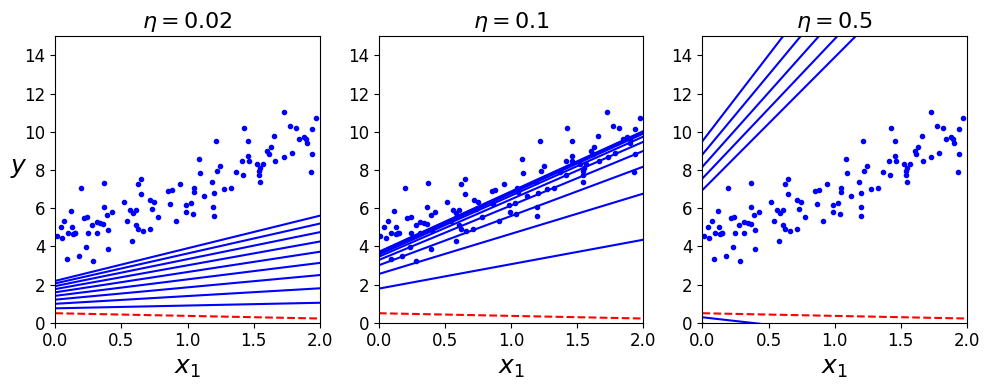

In [16]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

## Stochastic Gradient Descent

El principal problema de la Batch Gradient Descent es el hecho de que utiliza el **conjunto completo de entrenamiento** para calcular los gradientes en cada paso,
- lo que lo hace **muy lento** cuando el conjunto de entrenamiento es grande.

En el extremo opuesto, **Stochastic Gradient Descent** sólo elige **una muestra aleatoria** del conjunto de entrenamiento en cada paso y calcula los gradientes basándose sólo en esa muestra.

- Obviamente, esto hace que el algoritmo sea mucho más rápido, ya que tiene muy pocos datos que manipular en cada iteración.

- También hace posible entrenar conjuntos de entrenamiento enormes, ya que sólo una muestra necesita estar en memoria en cada iteración (SGD puede implementarse como un algoritmo out-of-core).

Por otra parte, debido a su naturaleza estocástica (es decir, aleatoria), este algoritmo es mucho **menos regular** que Batch Gradient Descent:  
- en lugar de disminuir suavemente hasta alcanzar el mínimo, la **función de coste rebotará arriba y abajo**, disminuyendo sólo en promedio.
- Con el tiempo acabará muy cerca del mínimo, pero una vez allí seguirá rebotando, sin estabilizarse nunca.
- Por tanto, una vez que el algoritmo se detiene, los valores finales de los parámetros son buenos, pero no óptimos.
- Cuando la función de coste es muy irregular, esto puede ayudar al algoritmo a salir de los mínimos locales,
  - así que Stochastic Gradient Descent tiene más posibilidades de encontrar el mínimo global que Batch Gradient Descent.

Por tanto, la aleatoriedad es buena para escapar de los óptimos locales, pero mala porque significa que el algoritmo nunca puede asentarse en el mínimo.
- Una solución a este dilema es reducir gradualmente la tasa de aprendizaje.
- Los pasos empiezan siendo grandes (lo que ayuda a progresar rápidamente y escapar de los mínimos locales), y luego se van haciendo cada vez más pequeños, lo que permite al algoritmo asentarse en el mínimo global.

El siguiente código implementa Stochastic Gradient Descent utilizando un programa simple para ajustar learning rate:
- La figura muestra los primeros 20 pasos del entrenamiento (observe lo irregulares que son los pasos).

In [17]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

Saving figure sgd_plot


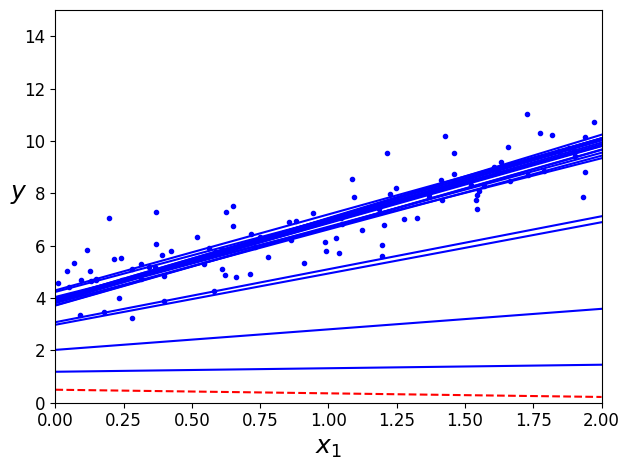

In [18]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("sgd_plot")
plt.show()

Por convención, iteramos por rondas de $m$ iteraciones; cada ronda se denomina **epoch**.
- Mientras que el código Batch Gradient Descent itera 1.000 veces a través de todo el conjunto de entrenamiento,
  - este código recorre el conjunto de entrenamiento sólo 50 veces y alcanza una solución bastante buena:

In [19]:
theta

array([[4.21076011],
       [2.74856079]])

Para realizar **Regresión lineal utilizando SGD** con Scikit-Learn, puede utilizar la clase `SGDRegressor`, que por defecto optimiza la función de coste de error al cuadrado.
- El siguiente código se ejecuta durante un máximo de 1000 epochs (`max_iter=1000`)
- o hasta que la pérdida caiga por debajo de $10^{-3}$ (`tol=1e-3`),
- comenzando con una tasa de aprendizaje de 0,1
(`eta0=0.1`),
- utilizando el algoritmo de ajuste de learning rate por defecto (diferente del anterior),
- y ninguna regularización (`penalty=None`).

In [20]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

Una vez más, se encuentra una solución bastante cercana a la que devuelve la Ecuación Normal:

In [21]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24365286]), array([2.8250878]))

## Mini-batch Gradient Descent

El último algoritmo de Gradient Descent que veremos se llama **Mini-batch Gradient Descent**.
- Es bastante sencillo de entender una vez que se conocen Batch y Stochastic Gradient Descent:
  - en cada paso, en lugar de calcular los gradientes basándose en el conjunto completo de entrenamiento (como en Batch GD) o basándose en una sola muestra (como en Stochastic GD),
  - se calculan los gradientes en pequeños conjuntos aleatorios de muestras denominados minilotes.
- La principal ventaja de Minibatch GD sobre Stochastic GD es que puede obtener un aumento de rendimiento gracias a la optimización por hardware de las operaciones matriciales, especialmente cuando se utilizan GPUs.

El progreso del algoritmo en el espacio de parámetros es menos errático que con SGD, especialmente con minilotes bastante grandes.
- Como resultado, Mini-batch GD acabará un poco más cerca del mínimo que SGD.
- Pero, por otro lado, puede resultarle más difícil escapar de los mínimos locales.
- La siguiente figura muestra los caminos tomados por los tres algoritmos de Descenso Gradiente en el espacio de parámetros durante el entrenamiento.
  - Todos acaban cerca del mínimo,
    - pero el camino de Batch GD se detiene en el mínimo,
    - mientras que tanto Stochastic GD como Mini-batch GD siguen dando vueltas.
  - Sin embargo, no hay que olvidar que Batch GD tarda mucho tiempo en dar cada paso,
    - y Stochastic GD y Mini-batch GD también alcanzarían el mínimo si se utilizara un buen algoritmo de ajuste de la learning rate.

In [22]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [23]:
theta

array([[4.25214635],
       [2.7896408 ]])

In [24]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

Saving figure gradient_descent_paths_plot


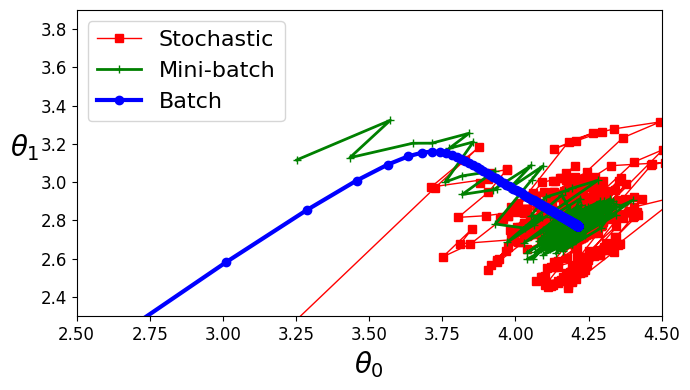

In [25]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("gradient_descent_paths_plot")
plt.show()

Vamos a **comparar los algoritmos** que hemos discutido hasta ahora para la Regresión Lineal (recordemos que $m$ es el número de instancias de entrenamiento y $n$ es el número de características).

<table>
<thead>
<tr><td>Algorithm</td><td>Large $m$</td><td>Out-of-core support</td><td>Large $n$</td><td>Hyperparams</td><td>Scaling required</td><td>Scikit-Learn</td></tr>
</thead>
<tbody>
<tr>
<td>Normal Equation</td><td>Fast</td><td>No</td><td>Slow</td><td>0</td><td>No</td><td>n/a</td>
</tr>
<tr>
<td>SVD</td><td>Fast</td><td>No</td><td>Slow </td><td>0</td><td>No</td><td>LinearRegression</td>
</tr>
<tr>
<td>Batch GD</td><td>Slow</td><td>No</td><td>Fast</td><td>2</td><td>Yes</td><td>SGDRegressor</td>
</tr>
<tr>
<td>Stochastic GD</td><td>Fast</td><td>Yes</td><td>Fast</td><td>≥2</td><td>Yes</td><td>SGDRegressor</td>
</tr>
<tr>
<td>Mini-batch GD</td><td>Fast</td><td>Yes</td><td>Fast</td><td>≥2</td><td>Yes</td><td>SGDRegressor</td>
</tr>
</tbody>
</table>

Casi no hay diferencias después del entrenamiento: todos estos algoritmos acaban con modelos muy similares y hacen predicciones exactamente de la misma manera.

# Regresión polinómica

¿Y si los datos son más **complejos** que una simple línea recta?
- Sorprendentemente, se puede utilizar un modelo lineal para ajustar datos no lineales.
- Una forma sencilla de hacerlo es añadir potencias de cada característica como nuevas características,
  - a continuación, entrenar un modelo lineal en este conjunto ampliado de características.
- Esta técnica se denomina regresión polinómica.

Veamos un ejemplo.
- En primer lugar, vamos a generar algunos datos no lineales, basados en una simple ecuación cuadrática (más algo de ruido).

In [26]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [27]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

Saving figure quadratic_data_plot


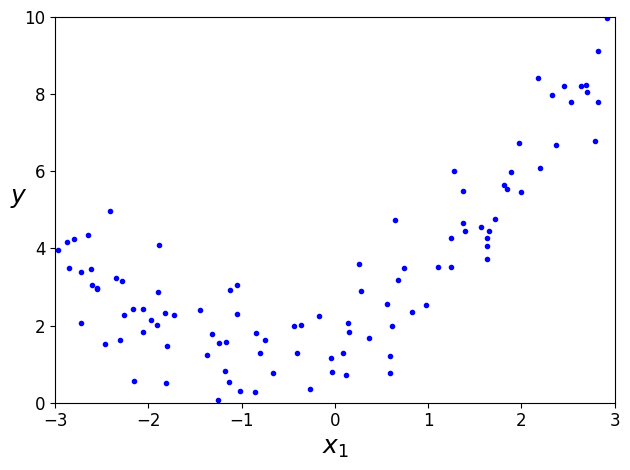

In [28]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_data_plot")
plt.show()

Está claro que una línea recta nunca se ajustará correctamente a estos datos.
- Así que vamos a utilizar la clase `PolynomialFeatures` de Scikit-Learn para transformar nuestros datos de entrenamiento, añadiendo el cuadrado (polinomio de 2º grado) de cada característica en el conjunto de entrenamiento como nuevas características (en este caso sólo hay una característica):

In [29]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [30]:
X_poly[0]

array([-0.75275929,  0.56664654])

`X_poly` contiene ahora la característica original de `X` más el cuadrado de esta característica.
- Ahora puede ajustar un modelo `LinearRegression` a estos datos de entrenamiento ampliados.

In [31]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

No está mal:
- el modelo estima $y = 0,56 x_1^2 + 0,93 x_1 + 1,78$
- cuando en realidad la función original era $y = 0,5 x_1^2 + 1,0 x_1 + 2,0 + \text{ruido gaussiano}$.

Saving figure quadratic_predictions_plot


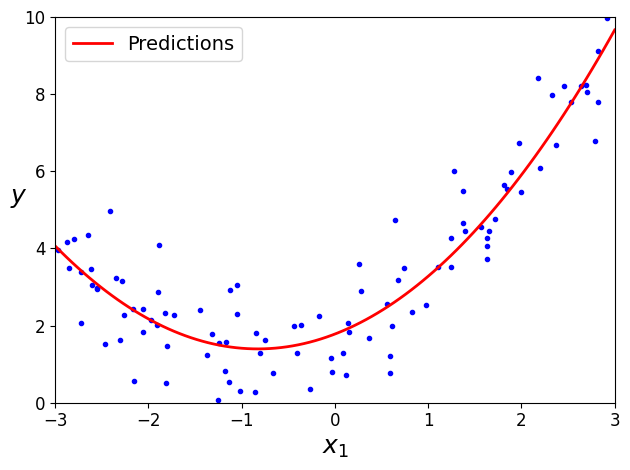

In [32]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_predictions_plot")
plt.show()

Hay que tener en cuenta que cuando hay múltiples características,
- la regresión polinómica es capaz de encontrar relaciones entre características
  - que es algo que un modelo de regresión lineal simple no puede hacer.
- Esto es posible por el hecho de que `PolynomialFeatures` también añade todas las combinaciones de características hasta el grado dado.
  - Por ejemplo, si hubiera dos características $a$ y $b$,
    - `PolynomialFeatures` con `degree=3`, no sólo añadiría las características $a^2$, $a^3$, $b^2$ y $b^3$,
      - sino también las combinaciones $ab$, $a^2b$ y $ab^2$.

Si realiza una Regresión Polinómica de alto grado,
- probablemente se ajustará a los datos de entrenamiento mucho mejor que con la Regresión lineal simple.
- Por ejemplo, la siguiente figura aplica un modelo polinómico de 300 grados a los datos de entrenamiento anteriores,
  - y compara el resultado con un modelo lineal puro y un modelo cuadrático (polinomio de 2º grado).
- Observe cómo el modelo polinómico de 300 grados se contonea para acercarse lo más posible a las muestras de entrenamiento.

Saving figure high_degree_polynomials_plot


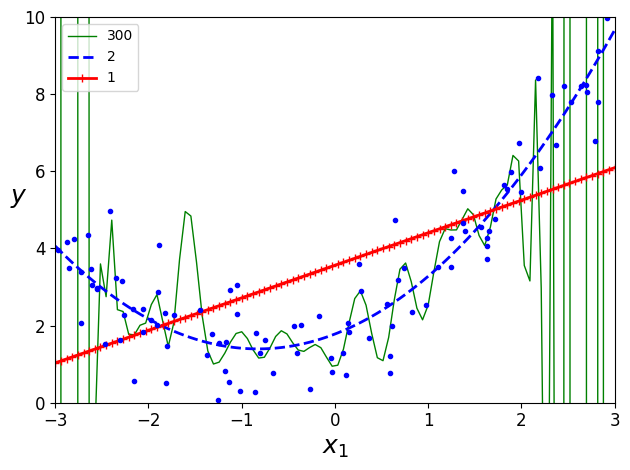

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("high_degree_polynomials_plot")
plt.show()

Por supuesto, este modelo de regresión polinómica de alto grado sobreajusta los datos de entrenamiento, mientras que el modelo lineal los infraajusta.
- El modelo que mejor generalizará en este caso es el modelo cuadrático.
  - Tiene sentido, ya que los datos se generaron utilizando un modelo cuadrático,
  - pero en general no sabrás qué función generó los datos, así que
    - ¿cómo decidir la complejidad del modelo?
    - ¿Cómo puedes saber si tu modelo se ajusta demasiado o demasiado poco a los datos?

# Curvas de aprendizaje (Learning Curves)

Anteriormente hemos utilizado la validación cruzada para obtener una estimación del rendimiento de generalización de un modelo.
- Si un modelo funciona bien en los datos de entrenamiento pero generaliza mal según las métricas de validación cruzada, entonces su modelo está sufriendo **overfitting**.
- Si su rendimiento es bajo en ambos casos, entonces está sufrienfo **underfitting**.
- Esta es una forma de saber si un modelo es demasiado simple o demasiado complejo.

Otra forma es observar las **curvas de aprendizaje**:
- se trata de gráficos del rendimiento del modelo en el conjunto de entrenamiento y en el conjunto de validación en **función del tamaño del conjunto de entrenamiento** (o de la iteración de entrenamiento).
- Para generar los gráficos, basta con entrenar el modelo varias veces con subconjuntos de distinto tamaño del conjunto de entrenamiento.

El siguiente código define una función que traza las curvas de aprendizaje de un modelo dados unos datos de entrenamiento:

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

Saving figure underfitting_learning_curves_plot


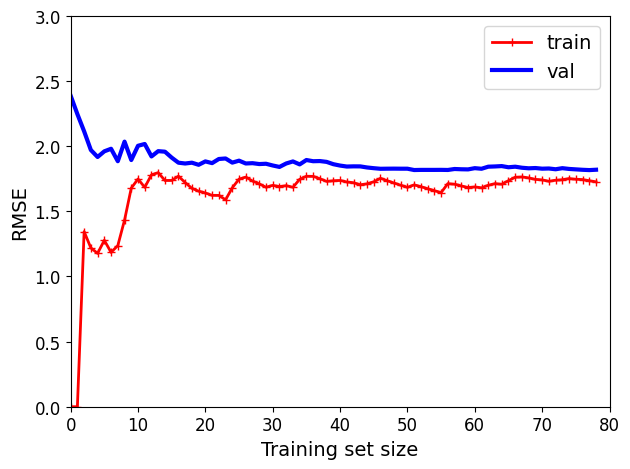

In [35]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
save_fig("underfitting_learning_curves_plot")
plt.show()

En primer lugar, veamos el **rendimiento en los datos de entrenamiento**:

- cuando sólo hay una o dos muestras en el conjunto de entrenamiento, el modelo puede ajustarse perfectamente a ellas,
  - por eso la curva empieza en cero.
- Pero a medida que se añaden nuevas muestras al conjunto de entrenamiento, resulta imposible que el modelo se ajuste perfectamente a los datos de entrenamiento,
  - tanto porque los datos tienen ruido como porque no son lineales en absoluto.
  - Así que el error en los datos de entrenamiento aumenta hasta que llega a una meseta,
    - En ese momento, añadir nuevas muestras al conjunto de entrenamiento no mejora ni empeora mucho el error medio.

Veamos ahora el **rendimiento** del modelo en los **datos de validación**.
- Cuando el modelo se entrena con muy pocas muestras, es incapaz de generalizar correctamente,
  - por eso el error de validación es inicialmente muy grande.
- Luego, a medida que el modelo recibe más ejemplos de entrenamiento, aprende y, por tanto, el error de validación disminuye lentamente.
- Sin embargo, una vez más, una línea recta no puede hacer un buen trabajo modelando los datos,
  - así que el error acaba en una meseta, muy cerca de la otra curva.

Estas curvas de aprendizaje son típicas de un modelo de ajuste insuficiente.
- Ambas curvas han alcanzado una meseta; están cerca y son bastante altas.

> **NOTA**: Si su modelo no se ajusta a los datos de entrenamiento, no nos servirá de nada añadir más ejemplos de entrenamiento. Tendremos que utilizar un modelo más complejo o idear mejores características.

Veamos ahora las curvas de aprendizaje de un modelo polinómico de 10º grado sobre los mismos datos:

Saving figure learning_curves_plot


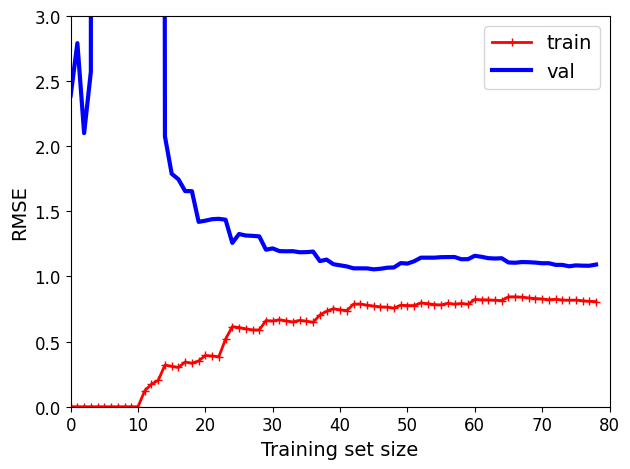

In [36]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
save_fig("learning_curves_plot")
plt.show()

Estas curvas de aprendizaje se parecen un poco a las anteriores, pero hay dos diferencias muy importantes:
- El error en los datos de entrenamiento es mucho menor que con el modelo de regresión lineal.
- Hay un hueco entre las curvas.
  - Esto significa que el modelo funciona mucho mejor con los datos de entrenamiento que con los datos de validación,
    - que es el sello distintivo de un modelo sobreajustado.
  - Sin embargo, si se utilizara un conjunto de entrenamiento mucho mayor, las dos curvas seguirían acercándose.

> **NOTA**: Una forma de mejorar un modelo sobreajustado es alimentarlo con más datos de entrenamiento hasta que el error de validación alcance el error de entrenamiento.

<div style="color:#fff;background-color:#006;padding:5px;"><strong>El equilibrio entre sesgo y varianza (Bias/Variance Tradeoff)</strong></div>

<div style="color:#000;background-color:#dde;padding:5px;border:1px solid #006;">
    
Un importante resultado teórico de la estadística y el aprendizaje automático es el hecho de que el
**error de generalización** de un modelo puede expresarse como la **suma de tres errores muy diferentes**:

1. **Sesgo**. Esta parte del error de generalización se debe a suposiciones erróneas, como suponer
que los datos son lineales cuando en realidad son cuadráticos.
  - Lo más probable es que un modelo con un sesgo alto no se ajuste a los datos de entrenamiento.

2. **Varianza**. Esta parte se debe a la excesiva sensibilidad del modelo a pequeñas variaciones en los
datos de entrenamiento.
  - Un modelo con muchos grados de libertad (como un modelo polinómico de alto grado) es probable que tenga una alta varianza, y por lo tanto que sobreajuste los datos de entrenamiento.

3. **Error irreductible**. Esta parte se debe al ruido de los propios datos.
  - La única forma de reducir esta parte del error es limpiar los datos (por ejemplo, arreglar las fuentes de datos, como sensores rotos, o detectar y eliminar valores atípicos).

Aumentar la complejidad de un modelo suele aumentar su varianza y reducir su sesgo.
- A la inversa, reducir la complejidad de un modelo aumenta su sesgo y reduce su varianza.
- Por eso se habla de compromiso.
</div>

# Modelos lineales regularizados (Regularized Linear Models)

Una buena forma de reducir el sobreajuste es **regularizar el modelo** (es decir, restringirlo):

- cuantos menos grados de libertad tenga, más difícil será que sobreajuste los datos.
  - Por ejemplo, una forma sencilla de regularizar un modelo polinómico es reducir el número de grados polinómicos.
  - Para un modelo lineal, la regularización se consigue normalmente restringiendo los pesos del modelo.
    - Los modelos **Ridge Regression**, **Lasso Regression**, y **Elastic Net**, implementan tres formas diferentes de restringir los pesos.

## Ridge Regression

La regresión Ridge (también llamada regularización de Tikhonov) es una **versión regularizada de la regresión lineal**.

- Se añade a la función de coste un **término de regularización** igual a $\frac{\alpha}{m}\sum_{i=1}^n \theta_i^2$.
- Esto obliga al algoritmo de aprendizaje no sólo a ajustarse a los datos, sino también a **mantener los pesos del modelo lo más pequeños posible**.
- Hay que temer en cuenta que el término de regularización sólo debe añadirse a la función de coste durante el entrenamiento.
  - Una vez que el modelo está entrenado, se desea evaluar el rendimiento del modelo utilizando la medida de rendimiento no regularizada.
- El hiperparámetro $\alpha$ controla **cuánto se quiere regularizar** el modelo.
  - Si $\alpha = 0$ entonces la Regresión Ridge es sólo Regresión Lineal.
  - Si $\alpha$ es muy grande, entonces todos los pesos terminan muy cerca de cero y el resultado es una línea plana que pasa por la media de los datos.
  - Por lo tanto, la función de coste de Regresión Ridge se calcula como:
  
<center>
$J(\theta) = \text{MSE}(\theta) + \frac{\alpha}{m}\sum_{i=1}^n \theta_i^2$
</center>

> También hay en cuenta que el término de sesgo $\theta_0$ no está regularizado (la suma comienza en i = 1, no 0).

A continuación se explica cómo realizar la regresión Ridge con Scikit-Learn utilizando una técnica de factorización de matrices de André-Louis Cholesky:

In [37]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [38]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [39]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55072189]])

La siguiente figura muestra varios modelos Ridge entrenados en algunos datos lineales utilizando diferentes valores $\alpha$.
- A la izquierda, se utilizan modelos Ridge simples, que conducen a predicciones lineales.
- A la derecha, los datos se expanden primero usando `PolynomialFeatures(degree=10)`, luego se escalan usando un `StandardScaler`, y finalmente los modelos Ridge se aplican a las características resultantes:
  - esto es **Regresión polinómica con regularización Ridge**.

Saving figure ridge_regression_plot


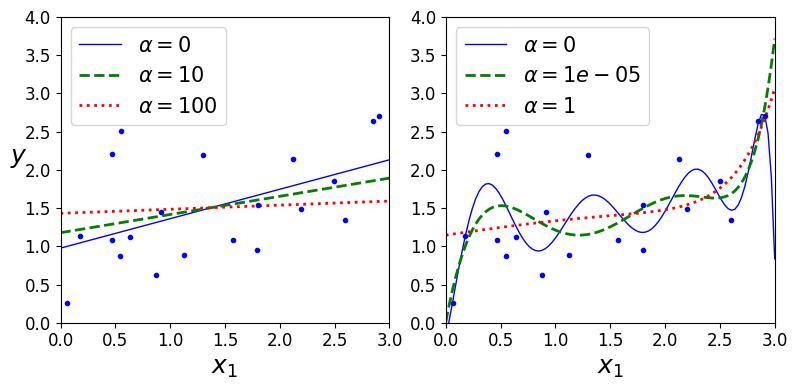

In [40]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

save_fig("ridge_regression_plot")
plt.show()

Al igual que con la regresión lineal, podemos realizar la regresión Ridge resolviendo una ecuación o mediante Gradient Descent.
- Los pros y los contras son los mismos.

In [41]:
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1/m, max_iter=1000, tol=None, eta0=0.01,random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.55302613])

- El hiperparámetro `penalty` establece el tipo de término de regularización a utilizar.
- Especificar `"l2"` indica que se desea que SGD añada un término de regularización a la función de coste igual a alfa por el cuadrado de la normal $l_2$ del vector peso:
  - esto es simplemente **Regresión Ridge**.

## Regresión Lasso (Lasso Regression)

**Least Absolute Shrinkage and Selection Operator Regression** (llamada simplemente Regresión Lasso) es otra versión regularizada de la Regresión Lineal:

- al igual que la Regresión Ridge, añade un término de regularización a la función de coste, pero utiliza la norma $ℓ_1$ del vector de pesos en lugar de la mitad del cuadrado de la norma $ℓ_2$:

<center>
$J(\theta) = \text{MSE}(\theta) + 2\alpha\sum_{i=1}^n |\theta_i|$
</center>

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+00, tolerance: 9.295e-04
  model = cd_fast.enet_coordinate_descent(


Saving figure lasso_regression_plot


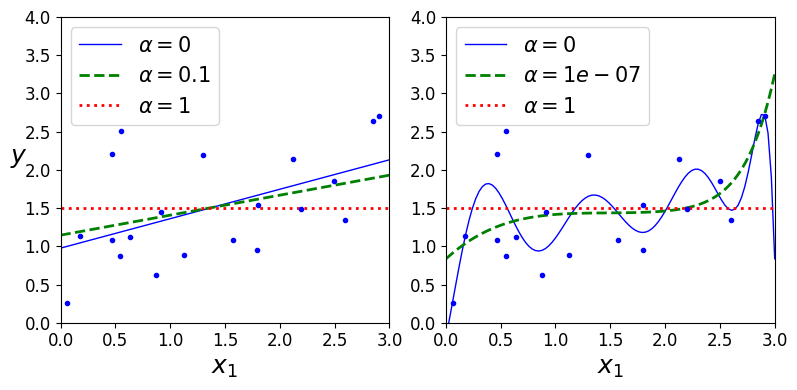

In [42]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

save_fig("lasso_regression_plot")
plt.show()

Aquí hay un pequeño ejemplo de Scikit-Learn usando la clase `Lasso`.

- Ten en cuenta que en su lugar podrías utilizar un `SGDRegressor(penalty="l1")`.

In [43]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

## Elastic Net

Elastic Net es un término medio entre la regresión Ridge y la regresión Lasso.
- El término de regularización es una simple mezcla de los términos de regularización de Ridge y Lasso, y se puede controlar la relación de mezcla *r*.
  - Cuando $r = 0$, Elastic Net es equivalente a la Regresión Ridge,
  - y cuando $r = 1$, es equivalente a la Regresión Lasso:

<center>
$J(\theta) = \text{MSE}(\theta) + r(2\alpha\sum_{i=1}^n |\theta_i|) + (1-r)(\frac{\alpha}{m}\sum_{i=1}^n \theta_i^2)$
</center>

Here is a short example using Scikit-Learn’s ElasticNet (`l1_ratio` corresponds to
the mix ratio *r*):

In [44]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

## Parada temprana (Early Stopping)

Una forma muy distinta de regularizar algoritmos de aprendizaje iterativo como Gradient Descent es detener el entrenamiento en cuanto el error de validación alcance un mínimo.

- Esto se denomina **parada temprana**.

He aquí una aplicación básica de early stopping:

- Fíjate que con `warm_start=True`, cuando se llama al método `fit()`, simplemente continúa el entrenamiento donde lo dejó, en lugar de reiniciar desde cero.

In [45]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [46]:
from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,  warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stocha

La siguiente figura muestra un modelo complejo (en este caso, un modelo de regresión polinómica de alto grado) que se entrena utilizando el Descenso Gradiente por Lotes.

- A medida que pasan los epochs, el algoritmo aprende y su error de predicción (RMSE) en el conjunto de entrenamiento disminuye de forma natural, al igual que su error de predicción en el conjunto de validación.
- Sin embargo, al cabo de un tiempo, el error de validación deja de disminuir y empieza a aumentar.
  - Esto indica que el modelo ha empezado a sobreajustar los datos de entrenamiento.
- Con la parada anticipada se detiene el entrenamiento en cuanto el error de validación alcanza el mínimo.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stocha

Saving figure early_stopping_plot


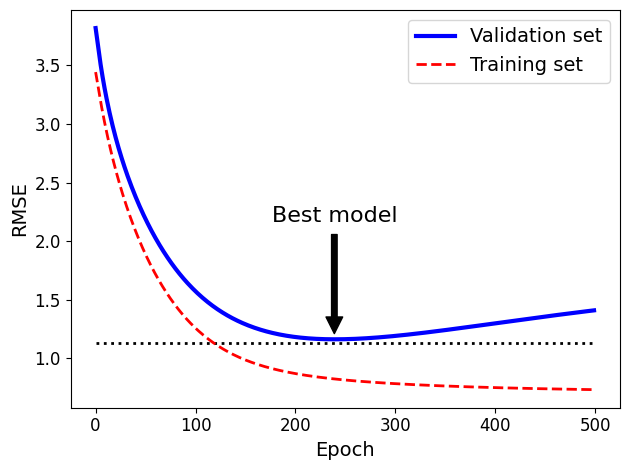

In [47]:
sgd_reg = SGDRegressor(max_iter=1,  warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
save_fig("early_stopping_plot")
plt.show()

In [48]:
best_epoch, best_model

(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, warm_start=True))

# Regresión logística (Logistic Regression)

Algunos algoritmos de regresión pueden utilizarse también para la clasificación (y viceversa).

- La **regresión logística** suele utilizarse para estimar la probabilidad de que una muestra pertenezca a una clase determinada (por ejemplo, ¿cuál es la probabilidad de que este correo electrónico sea spam?).

  - Si la probabilidad estimada es superior al 50%, el modelo predice que la muestra pertenece a esa clase.
    - (llamada clase positiva, etiquetada como "1"),
  - o bien predice que no pertenece
    - (es decir, pertenece a la clase negativa, etiquetada como "0").
  - Se trata de un clasificador binario.

¿Cómo funciona? Al igual que un modelo de Regresión Lineal, un modelo de Regresión Logística calcula una suma ponderada de las características de entrada (más un término de sesgo), pero en lugar de emitir el resultado directamente como hace el modelo de Regresión Lineal, emite la función logística de este resultado:

<center>
$\hat{p} = h_{\theta}(x) = \sigma ( x^T \theta ) $
</center>

La función logística $\sigma(\cdot)$ es una función sigmoidea (es decir, con forma de S) que da como resultado un número entre 0 y 1.

<center>
$\sigma(t) = \frac{1}{1+e^{-t}}$
</center>

Una vez que el modelo de regresión logística ha estimado la probabilidad $\hat{p} = h_{\theta}(x)$ de que una muestra $x$ pertenezca a la clase positiva, puede hacer su predicción $\hat{y}$ fácilmente

<center>
$\hat{y} = \begin{cases} 0 \text{ if } \hat{p} \lt 0.5 \\ 1 \text{ if } \hat{p} \ge 0.5 \\ \end{cases}$
</center>

Saving figure logistic_function_plot


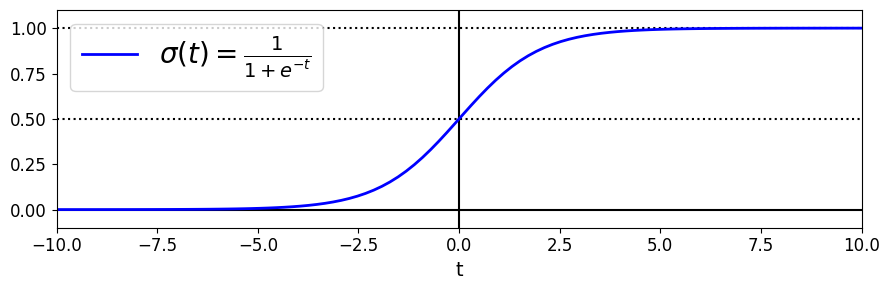

In [49]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
save_fig("logistic_function_plot")
plt.show()

## Límites de decisión (Decision Boundaries)

Utilicemos el conjunto de datos del iris para ilustrar la regresión logística.
- Se trata de un famoso conjunto de datos que contiene la longitud y anchura de los sépalos y pétalos de 150 flores de iris de tres especies diferentes:
  - Iris-Setosa, Iris-Versicolor e Iris-Virginica.

In [50]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [51]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

Trabajaremos con un subconjunto del dataset. Nos quedamos sólo con la anchura del pétalo. Además, entrenaremos un modelo binario que nos diga si la flor es Iris Virginica o no.

In [52]:
X = iris["data"][:, 3:]  # petal width
y = iris.target_names[iris.target] == 'virginica'

Ahora vamos a entrenar un modelo de Regresión Logística.

> **Nota**: Para estar preparados para el futuro establecemos `solver="lbfgs"` ya que este será el valor por defecto en Scikit-Learn 0.22.

In [53]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

Veamos las probabilidades estimadas del modelo para flores con anchuras de pétalo que varían de 0 a 3 cm:

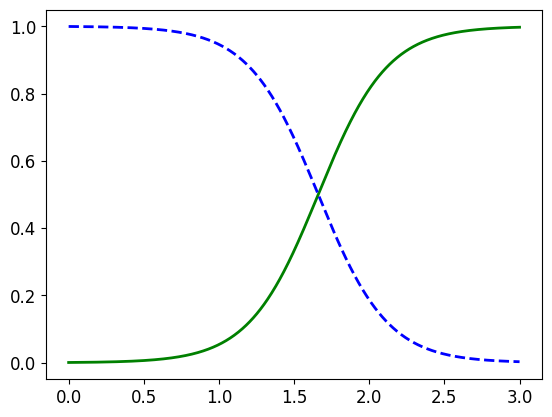

In [54]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

Un poco más elegante:

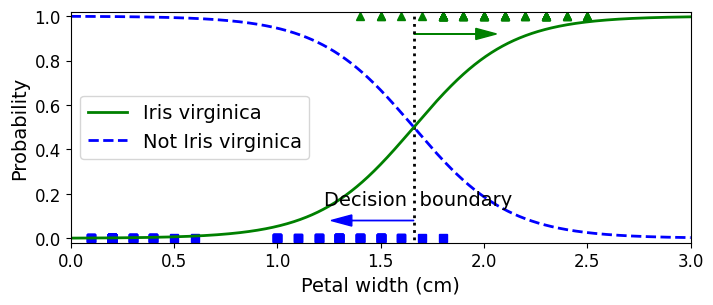

In [55]:
# Calculate decision boundary
decision_boundary = -log_reg.intercept_[0] / log_reg.coef_[0][0] # Extract the intercept and coefficient

# Now, use the scalar value in the plt.arrow call:
plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b') # This line caused the error
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
#save_fig("logistic_regression_plot")
plt.show()

In [56]:
decision_boundary

1.6603319735278126

La anchura de los pétalos de las flores de Iris-Virginica (representadas por triángulos) oscila entre 1,4 cm y 2,5 cm, mientras que las demás flores de iris (representadas por cuadrados) suelen tener una anchura de pétalo menor, que oscila entre 0,1 cm y 1,8 cm.

- Obsérvese que hay cierto solapamiento. Por encima de unos 2 cm, el clasificador está muy seguro de que la flor es una Iris-Virginica (asigna una alta probabilidad a esa clase), mientras que por debajo de 1 cm está muy seguro de que no es una Iris-Virginica (alta probabilidad para la clase "No Iris-Virginica").
  - Entre estos extremos, el clasificador no está seguro.
- Sin embargo, si se le pide que prediga la clase (utilizando el método `predict()` en lugar del método `predict_proba()`), devolverá la clase que sea más probable.

- Por lo tanto, hay un límite de decisión alrededor de 1,6 cm donde ambas probabilidades son iguales al 50%:
  - si la anchura de los pétalos es superior a 1,6 cm, el clasificador predecirá que la flor es un Iris-Virginica, o bien predecirá que no lo es (aunque no esté muy seguro).

In [57]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

La siguiente figura muestra el mismo conjunto de datos, pero esta vez con dos características: la anchura y la longitud de los pétalos.

- Una vez entrenado, el clasificador de regresión logística puede estimar la probabilidad de que una nueva flor sea un Iris-Virginica basándose en estas dos características.
- La línea discontinua representa los puntos en los que el modelo estima una probabilidad del 50%:
  - se trata del límite de decisión del modelo.
- Se trata de un límite lineal.
- Cada línea paralela representa los puntos en los que el modelo da una probabilidad específica, del 15% (abajo a la izquierda) al 90% (arriba a la derecha).
- Todas las flores situadas más allá de la línea superior derecha tienen una probabilidad superior al 90% de ser Iris-Virginica según el modelo.

Saving figure logistic_regression_contour_plot


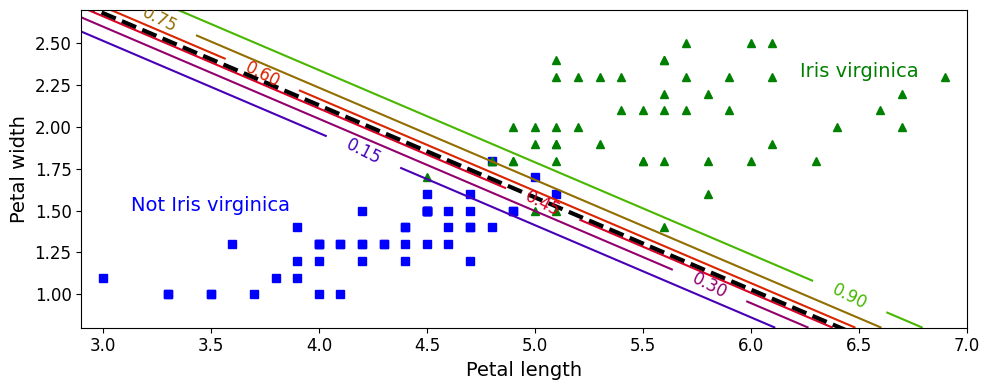

In [58]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris.target_names[iris.target] == 'virginica'

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
save_fig("logistic_regression_contour_plot")
plt.show()

Al igual que otros modelos lineales, los modelos de regresión logística se pueden regularizar utilizando $ℓ_1$ o $ℓ_2$.
- Scitkit-Learn añade una penalización $ℓ_2$ por defecto.

## Regresión Softmax (Softmax Regression)

El modelo de Regresión Logística puede generalizarse para soportar múltiples clases directamente, sin tener que entrenar y combinar múltiples clasificadores binarios.

- Esto se llama *Regresión Softmax*, o *Regresión Logística Multinomial*.

La idea es bastante simple:
- cuando se da una muestra $x$, el modelo de Regresión Softmax calcula primero una puntuación $s_k(x)$ para cada clase $k$,

<center>
$s_k(x) = (\theta^{(k)})^T x$
</center>

- luego estima la probabilidad de cada clase aplicando la función softmax (también llamada exponencial normalizada) a las puntuaciones.

<center>
$\hat{p}_k = \sigma(s(x))_k = \frac{\text{exp}(s_k(x))}{\sum_{j=1}^K \text{exp} ( s_j(x) )}$
</center>

- dónde,
  - $K$ es el número de clases.
  - $s(x)$ es un vector que contiene las puntuaciones de cada clase para la muestra $x$.
  - $\sigma(s(x))_k$ es la probabilidad estimada de que la instancia $x$ pertenezca a la clase $k$ dadas las puntuaciones de cada clase para esa instancia.

Vamos a utilizar la regresión Softmax para clasificar las flores del iris en las tres clases.
- `LogisticRegression` de Scikit-Learn utiliza regresión softmax automáticamente cuando se entrena con más de dos clases (asumiendo que se usa `solver="lbfgs"`, que es el por defecto).
- También aplica $ℓ_2$ regularización por defecto, que puede controlar utilizando el hiperparámetro $C$.

In [59]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, random_state=42)

Así, la próxima vez que encuentre un iris con pétalos de 5 cm de largo y 2 cm de ancho, puede pedirle a su modelo que le diga qué tipo de iris es, y éste responderá Iris-Virginica (clase 2) con un 94% de probabilidad (o Iris-Versicolor con un 5% de probabilidad):

In [60]:
softmax_reg.predict([[5, 2]])

array([2])

In [61]:
softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.06, 0.94]])

La siguiente figura muestra los límites de decisión resultantes, representados por los colores de fondo.

- Observe que los límites de decisión entre dos clases cualesquiera son lineales.
- La figura también muestra las probabilidades de la clase Iris-Versicolor, representadas por las líneas curvas
  - (por ejemplo, la línea marcada con 0,450 representa el límite de probabilidad del 45%).
- Observe que el modelo puede predecir una clase con una probabilidad estimada inferior al 50%.
  - Por ejemplo, en el punto donde se encuentran todos los límites de decisión, todas las clases tienen la misma probabilidad estimada del 33%.

Saving figure softmax_regression_contour_plot


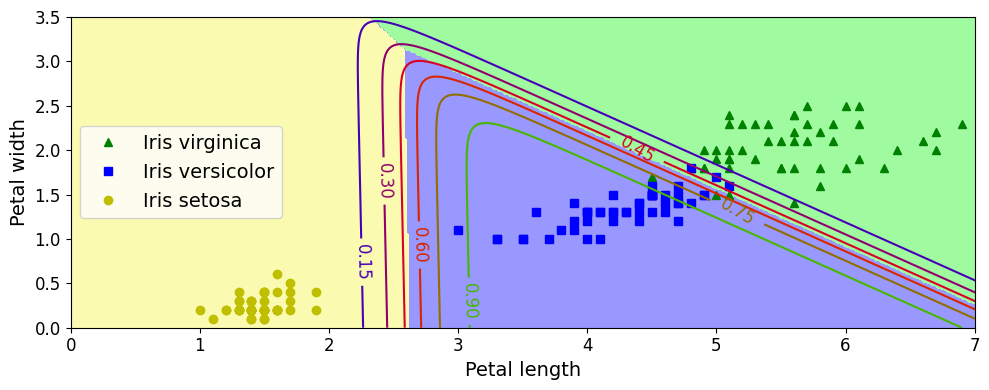

In [62]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
save_fig("softmax_regression_contour_plot")
plt.show()

# Ejercicios

1. ¿Qué algoritmo de entrenamiento de regresión lineal puede utilizar si dispone de un conjunto de entrenamiento con millones de características?

2. Suponga que las características de su conjunto de entrenamiento tienen escalas muy diferentes. ¿Qué algoritmos podrían verse afectados por esta situación? ¿Qué puede hacerse al respecto?

3. ¿Puede Gradient Descent quedarse atascado en un mínimo local al entrenar un modelo de Regresión Logística?

4. ¿Todos los algoritmos Gradient Descent conducen al mismo modelo si se les deja correr el tiempo suficiente?

5. Supongamos que utilizas Batch Gradient Descent y representas gráficamente el error de validación en cada epoch. Si observas que el error de validación aumenta constantemente, ¿qué puede estar pasando? ¿Cómo puede solucionarlo?

6. ¿Es una buena idea detener el Mini-Batch Gradient Descent inmediatamente cuando el error de validación aumenta?

7. ¿Qué algoritmo Gradient Descent (de entre los que hemos discutido) alcanzará más rápidamente la proximidad de la solución óptima? ¿Cuál convergerá realmente? ¿Cómo puedes hacer que los demás también converjan?

8. Supongamos que se utiliza la regresión polinómica. Se trazan las curvas de aprendizaje y se observa que hay una gran diferencia entre el error de entrenamiento y el error de validación. ¿Qué ocurre? ¿Cuáles son las tres formas de resolverlo?

9. Supongamos que se utiliza la regresión Ridge y se observa que el error de entrenamiento y el error de validación son casi iguales y bastante elevados. ¿Diría que el modelo tiene un sesgo alto o una varianza alta? ¿Debería aumentar el hiperparámetro de regularización α o reducirlo?

10. ¿Por qué querría utilizar...
- Regresión Ridge en lugar de Regresión Lineal simple (es decir, sin ninguna regularización)?
- Lasso en lugar de Ridge Regression?
- Elastic Net en lugar de Lasso?

11. Supongamos que se desea clasificar las imágenes como exteriores/interiores y diurnas/nocturnas. ¿Debería implementar dos clasificadores de Regresión Logística o un clasificador de Regresión Softmax?

12. Implementa Batch Gradient Descent con parada temprana para la Regresión Softmax (sin usar Scikit-Learn).